<a href="https://colab.research.google.com/github/JPVillamizarCastillo/TRAINING/blob/main/Modelos_de_regresi%C3%B3n_regularizados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regularización

In [1]:
#Pruebas Toyset

#importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

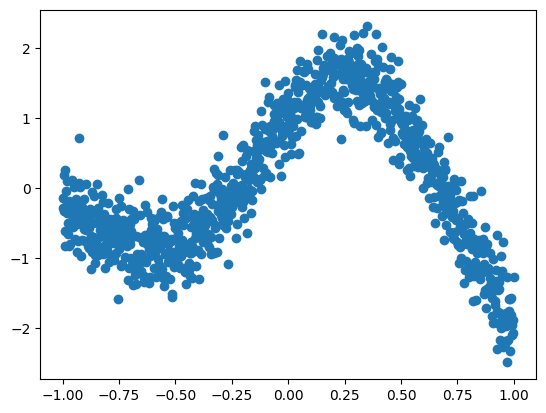

In [3]:
#Generamos el mismo toyset con el que probamos la regresion lineal

x=np.linspace(-1, 1, 1000)
ruido=np.random.normal(0, 0.333, 1000)

y=np.sin(4*x) + np.cos(3*x) + ruido

#Graficamos el ToySet
plt.scatter(x,y)
plt.show()

In [27]:
# Agregamos las librerás especializadas
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

#Organizamos las dimensiones
x=x.reshape(-1,1)

#generamos el pipeline
pipe=Pipeline([("poly", PolynomialFeatures()),
               ("model", LinearRegression(fit_intercept=True))])
# posibles valores que pueden tomas los hiperparametros
grados=range(2, 16)

# Inicializamos la lista de scores
score=[]

# Inicializamos la lista de los scores
mean_scores=[]

In [28]:
#Sintonizamos parametros

#gneramos un ciclo con los grados así:
for grado in grados:
  score=cross_val_score(pipe.set_params(poly__degree=grado),
                        X=x, y=y, cv=5, scoring="neg_mean_squared_error")
  scores.append(score)
  mean_scores.append(-score.mean())

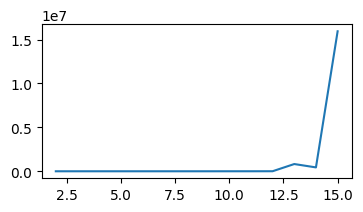

In [29]:
#Graficamos el rendimiento para decidir el valor del hiperparametro
plt.figure(figsize=(4,2))
plt.plot(grados, mean_scores)
plt.show()

Según los graficos de los resultados de la valización cruzada, el valor del grado adecuado seria de 5.

#Regularización $L-2$ (ridge)

En la regularización Ridge, se disminuyen algunos de los pesos de las caracteristicas, por lo tanto es posible tener un modelo con menor sobre-entrenamiento.

Para la regularización Ridge se tiene la siguiente funcion de pérdidas:

$$j(\Theta)= \sum_i (y_i - \theta X_i) + \lambda \sum_i(\theta)^2$$


In [32]:
#Importamos las librerias adicionales

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

#Particionamos los datos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [37]:
#Generamos las caracteristicas polinómicas
poly=PolynomialFeatures(degree=5)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.fit_transform(X_test)

# instanciamos el modelo
modelo=Ridge()

#creamos el diccionario del hiperparametro lambda
alpha=np.logspace(-4,2)
grid=dict(alpha=alpha)

from sklearn.model_selection import GridSearchCV

# instanciamos la búsqueda, en este caso haremos grid search
grid_search=GridSearchCV(estimator=modelo,
                         param_grid=grid,
                         scoring= "neg_mean_squared_error",
                         cv=5
                         )
#Generamos la busqueda
grid_result = grid_search.fit(X_train_poly, y_train)

In [38]:
best_modelo=grid_result.best_estimator_
best_modelo.fit(X_train_poly, y_train)

Ridge(alpha=0.003906939937054617)

In [39]:
# Validamos el modelo

y_train_pred=best_modelo.predict(X_train_poly)
y_test_pred=best_modelo.predict(X_test_poly)

print("MSE train: ", mean_squared_error(y_train, y_train_pred))
print("MSE test: ", mean_squared_error(y_test, y_test_pred))

MSE train:  0.11269487413646086
MSE test:  0.08293358519483912
